In [1]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
import statsmodels.api as sm

color = sns.color_palette()
sns.set_style('darkgrid')

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
train = pd.read_csv("train.csv")

In [4]:
#test = pd.read_csv("test.csv")

In [5]:
#train['date'] = pd.to_datetime(train['date'], format="%Y-%m-%d")
train.head()


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [3]:
train['item'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [4]:
train['store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [6]:
train.shape

(913000, 4)

In [5]:
# per 1 store, 1 item
train_df = train[train['store']==1]
train_df = train_df[train['item']==1]
#train_df = train_df.set_index('date')
###train_df['day'] = train['date'].dt.dayofyear
#train_df['weekday'] = train['date'].dt.weekday
train_df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


<Axes: xlabel='date', ylabel='sales'>

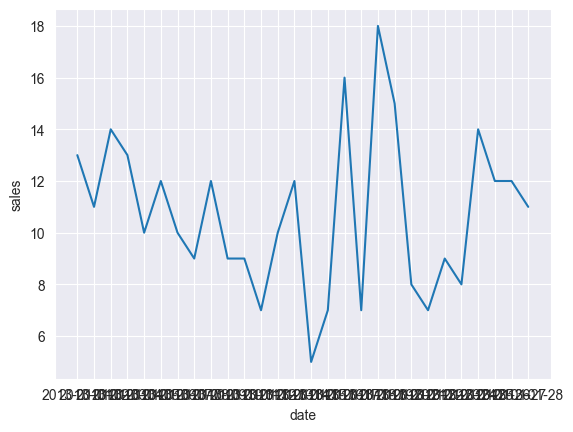

In [8]:
sns.lineplot(x="date", y="sales",legend = 'full' , data=train_df[:90])

In [9]:
train_df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
1821,2017-12-27,1,1,14
1822,2017-12-28,1,1,19
1823,2017-12-29,1,1,15
1824,2017-12-30,1,1,27


KeyError: 'store'

In [10]:
import pandas as pd
train_df['date'] = pd.to_datetime(train_df['date'])


train_df['year'] = train_df['date'].dt.year
train_df['month'] =train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day
train_df['year'] = train_df['year'].astype(int)
train_df['month'] = train_df['month'].astype(int)
train_df['day'] = train_df['day'].astype(int)


print(train_df)


           date  store  item  sales  year  month  day
0    2013-01-01      1     1     13  2013      1    1
1    2013-01-02      1     1     11  2013      1    2
2    2013-01-03      1     1     14  2013      1    3
3    2013-01-04      1     1     13  2013      1    4
4    2013-01-05      1     1     10  2013      1    5
...         ...    ...   ...    ...   ...    ...  ...
1821 2017-12-27      1     1     14  2017     12   27
1822 2017-12-28      1     1     19  2017     12   28
1823 2017-12-29      1     1     15  2017     12   29
1824 2017-12-30      1     1     27  2017     12   30
1825 2017-12-31      1     1     23  2017     12   31

[1826 rows x 7 columns]


In [11]:

X = train_df[['day','month','year','item']]

y = train_df['sales']



In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
predictions = model.score(X,y)
print( 'linear regression Accuracy: ')
print(((predictions)))
print( '')

linear regression Accuracy: 
0.11455143105457632



In [13]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data
regressor.fit(X, y)




RandomForestRegressor(random_state=0)

In [14]:


L= np.array([[ 1 , 1, 2013 ,1  ]])
L

array([[   1,    1, 2013,    1]])

In [15]:
y_pred=model.predict(L)
y_pred


array([15.13227662])

In [16]:
y_pedictin = regressor.predict(L)
y_pedictin

predictions2 = regressor.score(X,y)
print( 'RandomForest Accuracy: ')
print(((predictions2)))
print( '')

RandomForest Accuracy: 
0.8924268678220504



In [17]:
X

,day,month,year,item
0,1,1,2013,1
1,2,1,2013,1
2,3,1,2013,1
3,4,1,2013,1
4,5,1,2013,1
...,...,...,...,...
1821,27,12,2017,1
1822,28,12,2017,1
1823,29,12,2017,1
1824,30,12,2017,1


In [18]:
le_day = train_df['day']
le_month = train_df['month']
le_year = train_df['year']

le_item = train_df['item']

In [19]:
import pickle

In [20]:
info = {"model":regressor , "le_day": le_day,"le_month": le_month, "le_year":le_year,"le_item":le_item }
with open("saved.space.pkl" , 'wb') as file:
    pickle.dump(info,file)

In [21]:
with open("saved.space.pkl" , 'rb') as file:
    info = pickle.load(file)
model = info["model"]  
le_day = info["le_day"]  
le_month = info["le_month"]
le_year = info["le_year"]
le_item = info["le_item"]

In [22]:
train['date'] = pd.to_datetime(train['date'])


train['year'] = train['date'].dt.year
train['month'] =train['date'].dt.month
train['day'] = train['date'].dt.day
train['year'] = train['year'].astype(int)
train['month'] = train['month'].astype(int)
train['day'] = train['day'].astype(int)


print(train)

             date  store  item  sales  year  month  day
0      2013-01-01      1     1     13  2013      1    1
1      2013-01-02      1     1     11  2013      1    2
2      2013-01-03      1     1     14  2013      1    3
3      2013-01-04      1     1     13  2013      1    4
4      2013-01-05      1     1     10  2013      1    5
...           ...    ...   ...    ...   ...    ...  ...
912995 2017-12-27     10    50     63  2017     12   27
912996 2017-12-28     10    50     59  2017     12   28
912997 2017-12-29     10    50     74  2017     12   29
912998 2017-12-30     10    50     62  2017     12   30
912999 2017-12-31     10    50     82  2017     12   31

[913000 rows x 7 columns]


In [ ]:
first = train[train['year'] < 2016]
second = train[train['year'] >=2016]
first.shape , second.shape

((547500, 7), (365500, 7))

In [24]:
train_df = train_df.set_index('date')
train_df['sales'] = train_df['sales'].astype(float)

train_df.head()

,store,item,sales,year,month,day
date,,,,,,
2013-01-01,1,1,13.0,2013,1,1
2013-01-02,1,1,11.0,2013,1,2
2013-01-03,1,1,14.0,2013,1,3
2013-01-04,1,1,13.0,2013,1,4
2013-01-05,1,1,10.0,2013,1,5


In [25]:
train_df = train_df.drop(['store','year','month','day'],axis = 1)

In [26]:
def filter_by_product(data, item):
    return train_df[train_df['item'] == item]

In [27]:
def test_stationarity(df_train):
    # Plot rolling statistics
    rolling_mean = df_train.rolling(window=12).mean()
    rolling_std = df_train.rolling(window=12).std()
    plt.plot(df_train, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()


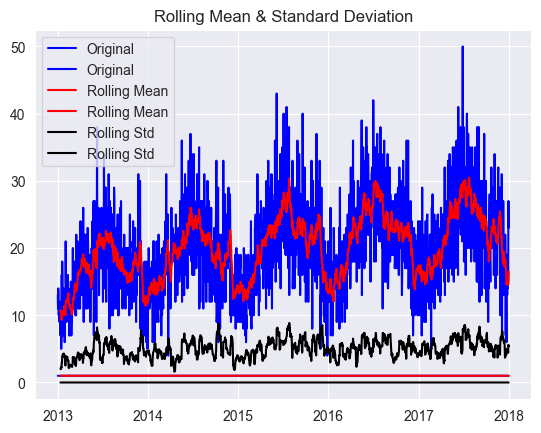

In [28]:
test_stationarity(train_df)

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

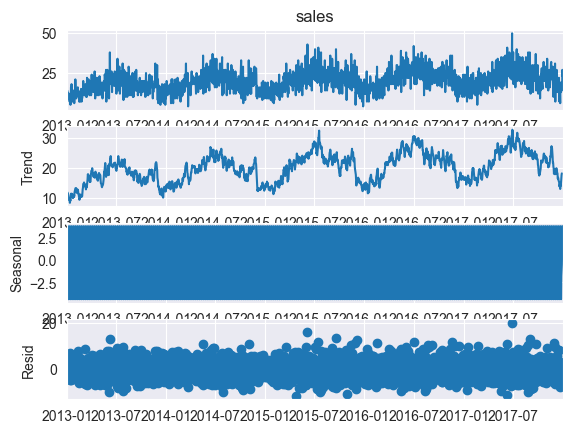

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train_df['sales'], model='additive')

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)


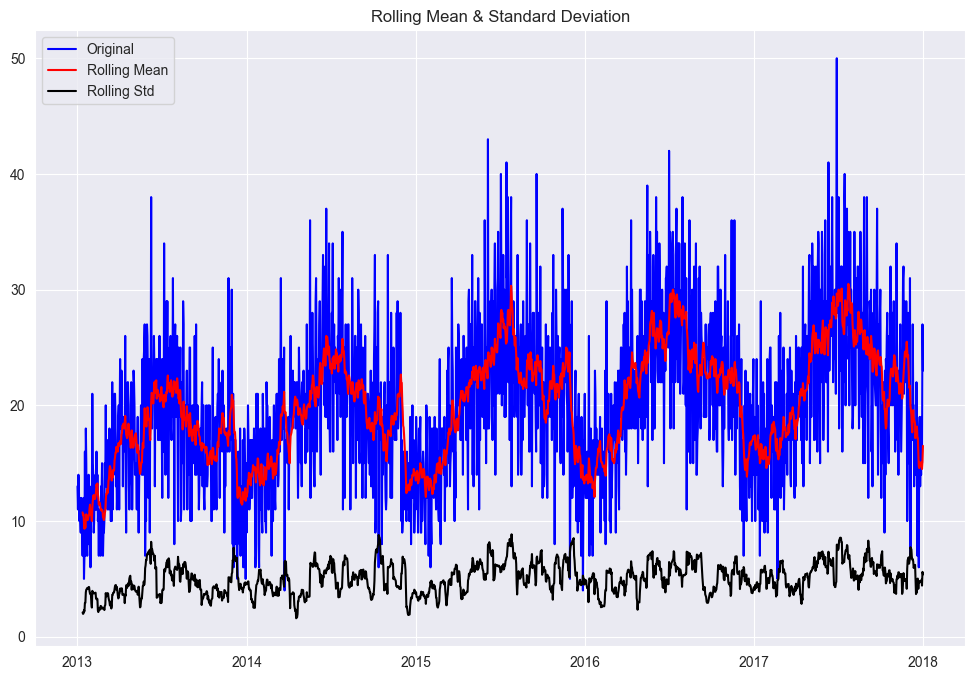

Results of Dickey-Fuller Test:
p-value = 0.0361. The series is likely non-stationary.
Test Statistic                   -2.987278
p-value                           0.036100
#Lags Used                       20.000000
Number of Observations Used    1805.000000
Critical Value (1%)              -3.433978
Critical Value (5%)              -2.863143
Critical Value (10%)             -2.567623
dtype: float64


In [ ]:
test_stationarity(train_df['sales'])

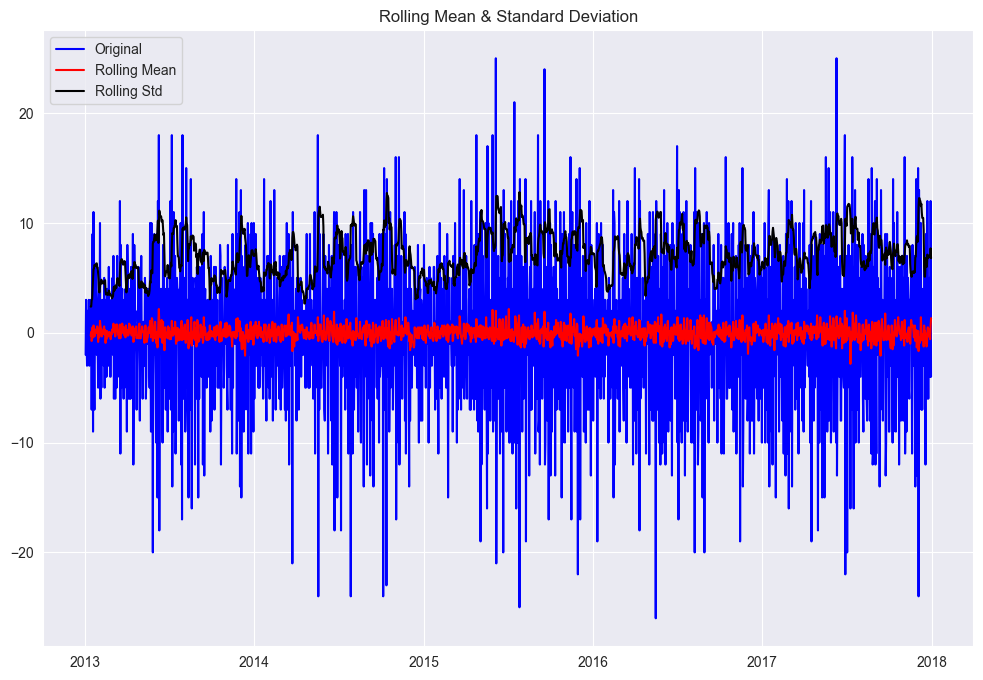

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.520810e+01
p-value                        5.705031e-28
#Lags Used                     2.000000e+01
Number of Observations Used    1.804000e+03
Critical Value (1%)           -3.433980e+00
Critical Value (5%)           -2.863143e+00
Critical Value (10%)          -2.567624e+00
dtype: float64


In [ ]:
first_diff = train_df.sales - train_df.sales.shift(1)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff, window = 12)

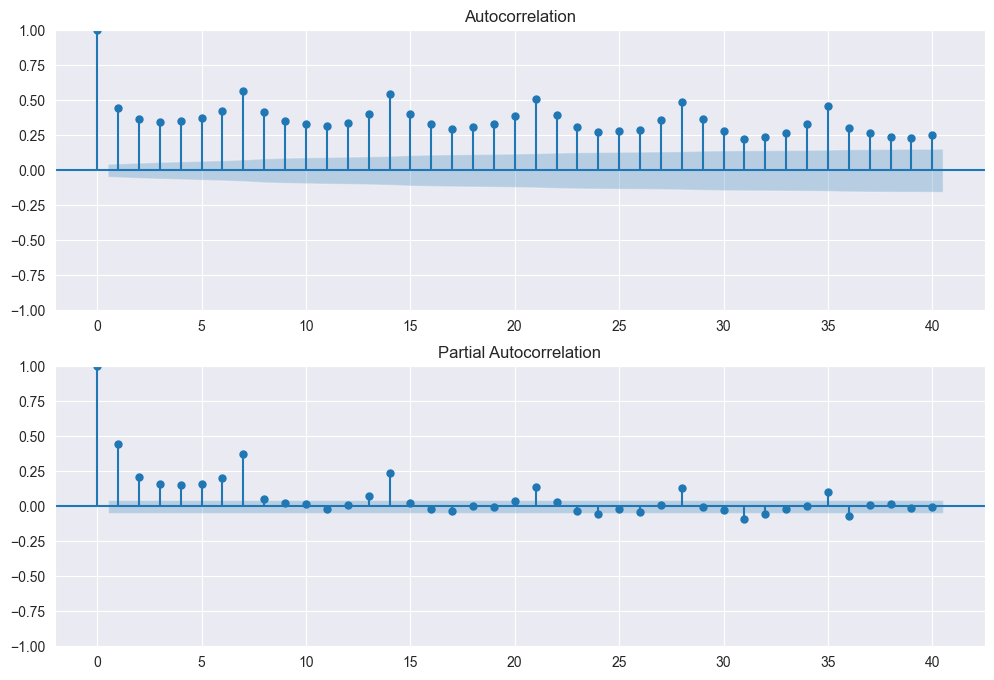

In [ ]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_df.sales, lags=40, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_df.sales, lags=40, ax=ax2)# , lags=40

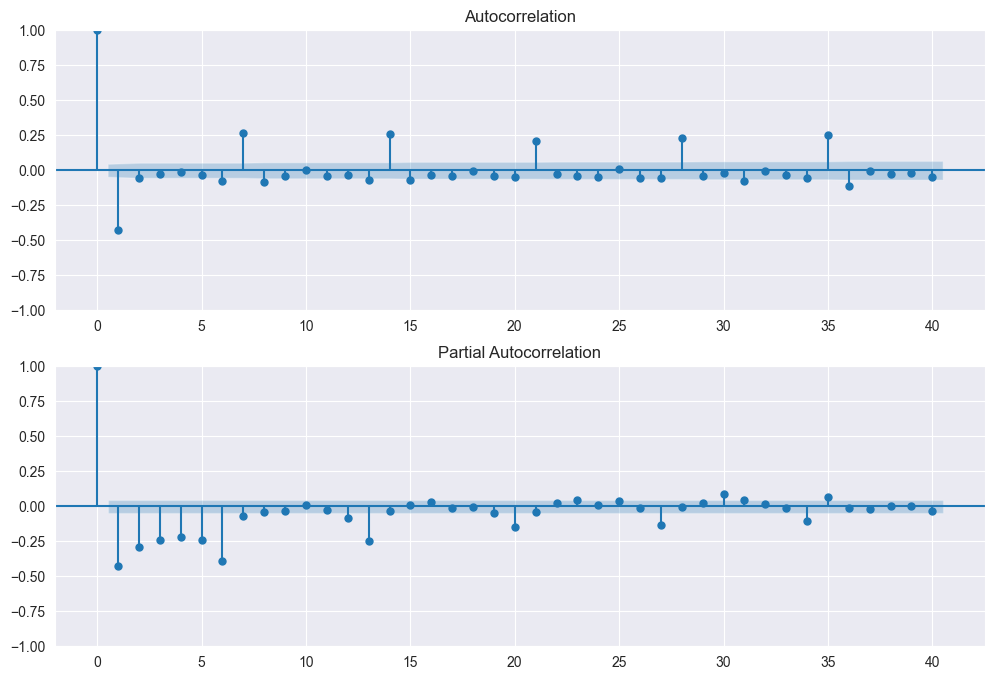

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, lags=40, ax=ax2)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
arima_mod6 =  sm.tsa.ARIMA(train_df.sales,order=(6,1,0))
model_fit= arima_mod6.fit()

c:\Users\Abhi\anaconda3\envs\environment1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Abhi\anaconda3\envs\environment1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Abhi\anaconda3\envs\environment1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
from scipy import stats
from scipy.stats import normaltest

In [ ]:
sarima_mod6 = sm.tsa.statespace.SARIMAX(train_df.sales, trend='n', order=(6,1,0)).fit()
print(sarima_mod6.summary())

c:\Users\Abhi\anaconda3\envs\environment1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Abhi\anaconda3\envs\environment1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1826
Model:               SARIMAX(6, 1, 0)   Log Likelihood               -5597.679
Date:                Mon, 17 Apr 2023   AIC                          11209.359
Time:                        19:50:29   BIC                          11247.924
Sample:                    01-01-2013   HQIC                         11223.585
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8174      0.021    -39.063      0.000      -0.858      -0.776
ar.L2         -0.7497      0.025    -30.480      0.000      -0.798      -0.702
ar.L3         -0.6900      0.026    -26.686      0.0

NormaltestResult(statistic=16.742690145385367, pvalue=0.00023140408899260736)


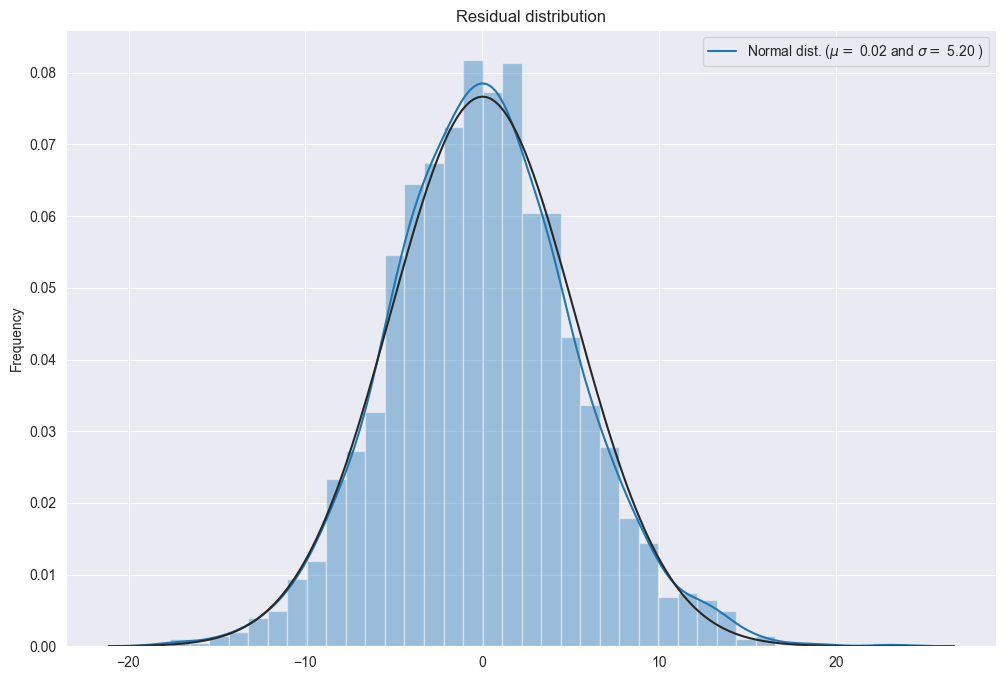

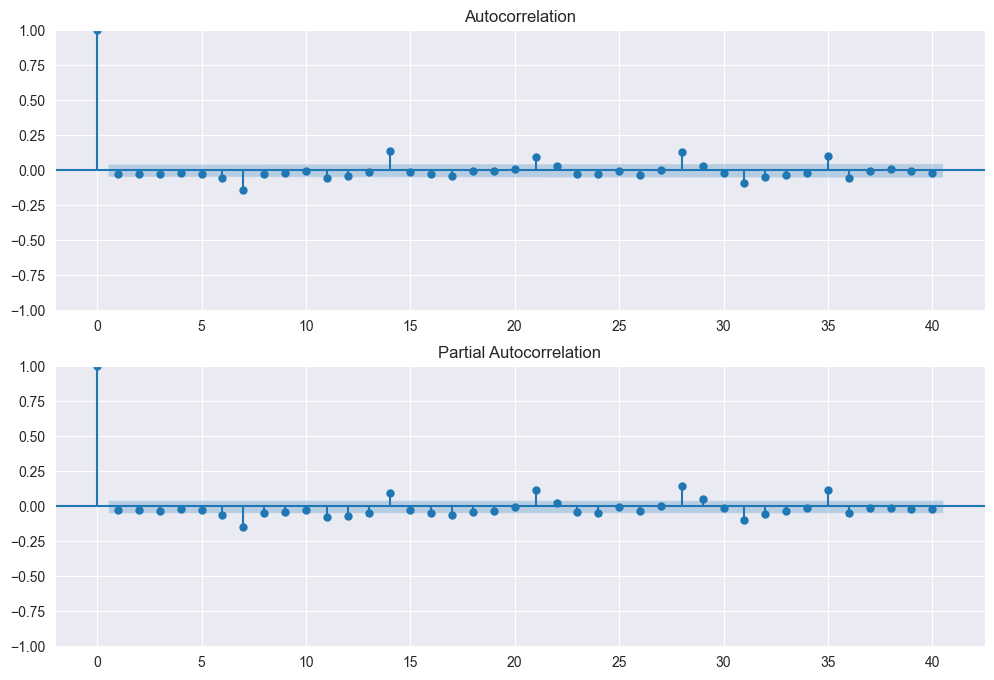

In [ ]:
resid = sarima_mod6.resid
print(normaltest(resid))

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sarima_mod6.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sarima_mod6.resid, lags=40, ax=ax2)

<Axes: xlabel='date'>

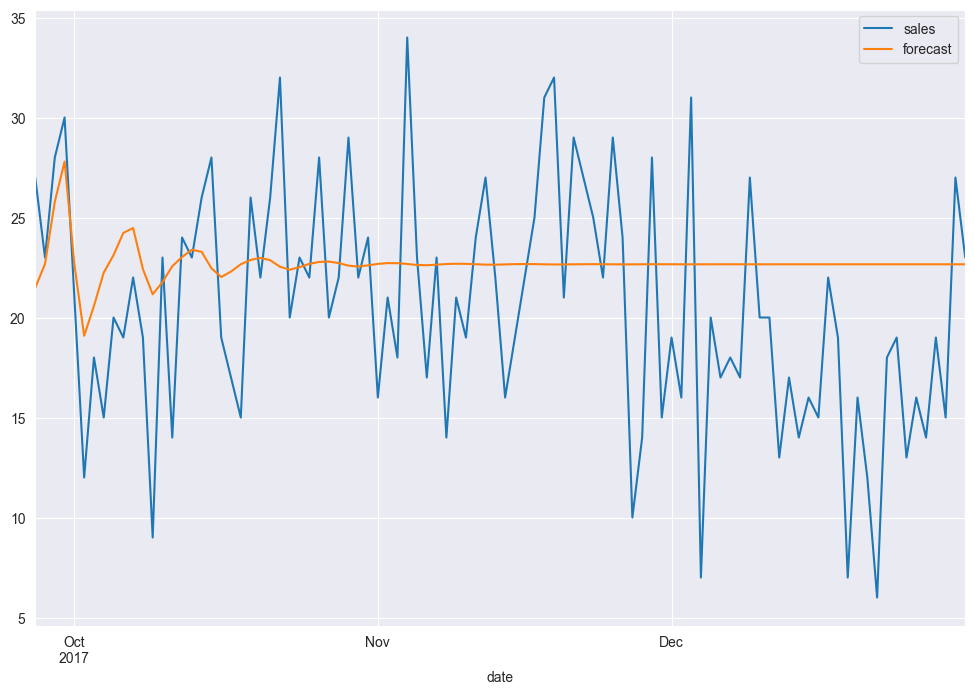

In [ ]:
start_index = 1730
end_index = 1826
train_df['forecast'] = sarima_mod6.predict(start = start_index, end= end_index, dynamic= True)  
train_df[start_index:end_index][['sales', 'forecast']].plot(figsize=(12, 8))

In [ ]:
# ne, names = ['date', 'holiday']
# holiday['date'] = pd.to_datetime(holiday['date'], yearfirst = True, format = '%y/%m/%d')
# holiday.head()

In [ ]:
ext_var_list = ['date','year', 'day', 'holiday_bool',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'holiday_Christmas Day', 'holiday_Columbus Day',
       'holiday_Independence Day', 'holiday_Labor Day',
       'holiday_Martin Luther King Jr. Day', 'holiday_Memorial Day',
       'holiday_New Year Day', 'holiday_Presidents Day (Washingtons Birthday)',
       'holiday_Thanksgiving Day', 'holiday_Veterans Day', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6']

In [ ]:
exog_data = train_df[ext_var_list]
# exog_data = exog_data.set_index('date')
# exog_data.head()

KeyError: "None of [Index(['date', 'year', 'day', 'holiday_bool', 'month_1', 'month_2', 'month_3',\n       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',\n       'month_10', 'month_11', 'month_12', 'holiday_Christmas Day',\n       'holiday_Columbus Day', 'holiday_Independence Day', 'holiday_Labor Day',\n       'holiday_Martin Luther King Jr. Day', 'holiday_Memorial Day',\n       'holiday_New Year Day', 'holiday_Presidents Day (Washingtons Birthday)',\n       'holiday_Thanksgiving Day', 'holiday_Veterans Day', 'weekday_0',\n       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',\n       'weekday_6'],\n      dtype='object')] are in the [columns]"

In [ ]:
start_index = '2017-10-01'
end_index = '2017-12-31'

In [ ]:
%%time
sarimax_mod6 = sm.tsa.statespace.SARIMAX(endog = train_df.sales[:start_index],
                                        exog = exog_data[:start_index],  
                                        trend='n', order=(6,1,0), seasonal_order=(0,1,1,7)).fit()
print(sarimax_mod6.summary())

In [ ]:
start_index = '2017-10-01'
end_index = '2017-12-30'
end_index1 = '2017-12-31'

In [ ]:
train_df['forecast'] = sarimax_mod6.predict(start = pd.to_datetime(start_index), end= pd.to_datetime(end_index1),
                                            exog = exog_data[start_index:end_index], 
                                            dynamic= True)  

train_df[start_index:end_index][['sales', 'forecast']].plot(figsize=(12, 8))